In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('Advertising.csv',index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [16]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
df.duplicated().sum()

0

There is no null and duplicates values in the dataset

### Statistical Analysis

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### Checking the sales via medium

Text(0.5, 1.0, 'Radio vs Sales')

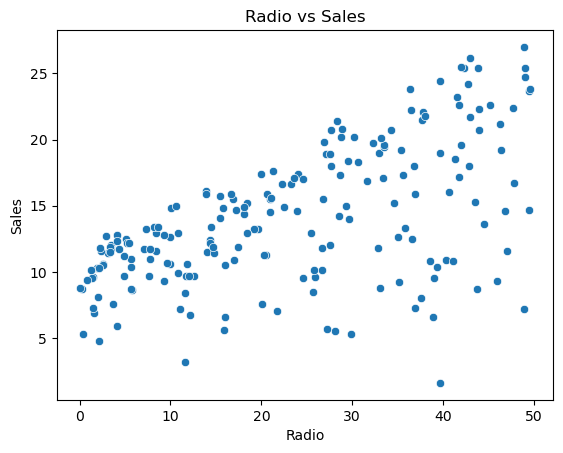

In [39]:
sns.scatterplot(x='Radio',y='Sales',data=df)
plt.title('Radio vs Sales')

* The scatterplot shows a positive correlation between advertising on the radio and sales.
* As the number of radio ads increases, sales tend to increase as well.
* However, there is some spread in the data, indicating variability in sales even with similar spending on radio.

Text(0.5, 1.0, 'TV vs Sales')

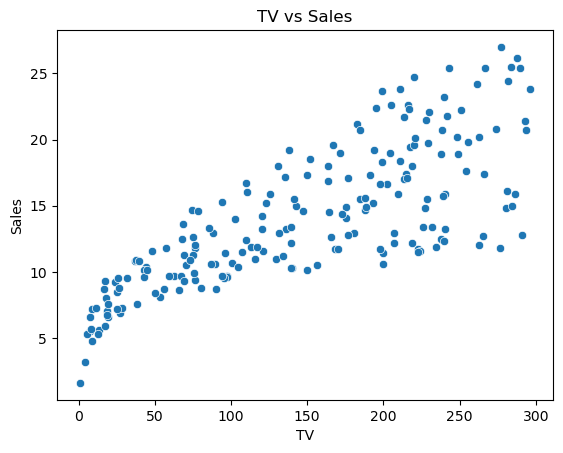

In [40]:
sns.scatterplot(x='TV',y='Sales',data=df)
plt.title('TV vs Sales')

* This scatterplot illustrates a powerful positive relationship between TV advertisements and sales.
* Undoubtedly, higher spending on TV advertising translates to higher sales levels with a more consistent pattern compared to radio or newspapers.
* This therefore means that TV is very effective in driving sales.

Text(0.5, 1.0, 'Newspaper vs Sales')

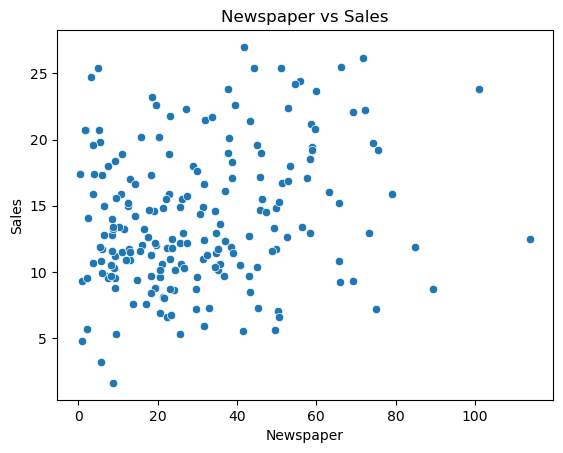

In [41]:
sns.scatterplot(x='Newspaper',y='Sales',data=df)
plt.title('Newspaper vs Sales')

* The scatterplot does not display much of a clear relationship between spending on newspaper advertising and sales.
* Points are spread way across. That means the spendings for newspapers don't impact much on the sales.
* This indicates that newspapers might not be as influential as radio or TV in affecting sales.

##### TV advertising appears to be the most effective medium for increasing sales, followed by radio. 

### Sales Disturbution

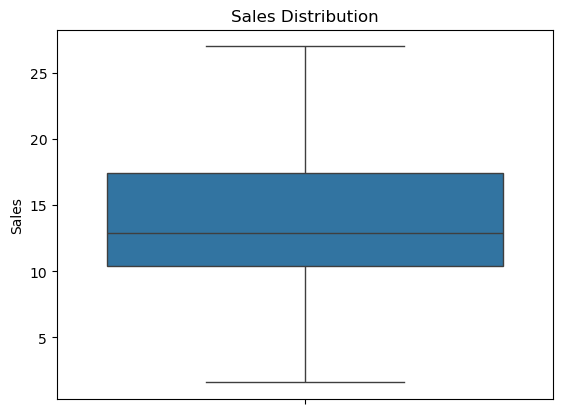

In [38]:
sns.boxplot(df['Sales'])
plt.title('Sales Distribution')
plt.show()

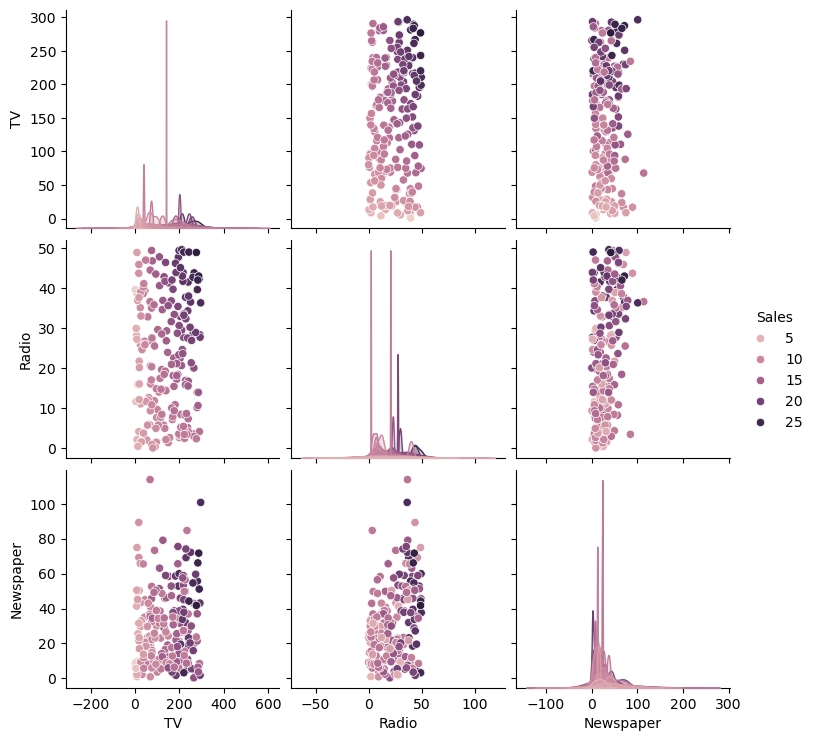

In [45]:
sns.pairplot(df,hue='Sales')

### Checing the correlation 

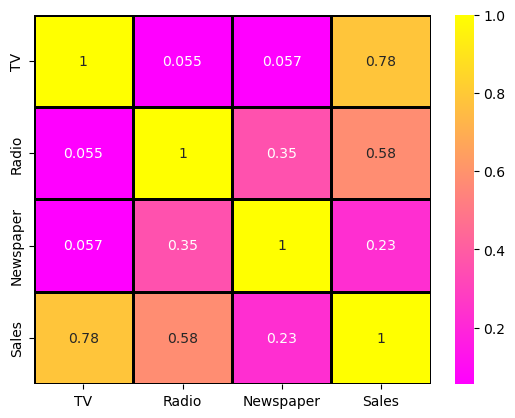

In [49]:
sns.heatmap(df.corr(), annot=True,cmap='spring',lw=1,linecolor='black')
plt.show()

### Building a predictive Model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
X = df[['TV', 'Radio', 'Newspaper']]    # Defining  features and target variable
y = df['Sales']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    # Splitting the  data into train and test set

In [54]:
model = LinearRegression()   #intializing and fitting the model 
model.fit(X_train, y_train)

LinearRegression()

#### prediction 

In [55]:
y_pred = model.predict(X_test)

#### Evaluation

In [56]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 3.1740973539761073
R2 Score: 0.8994380241009119


#### Risduals

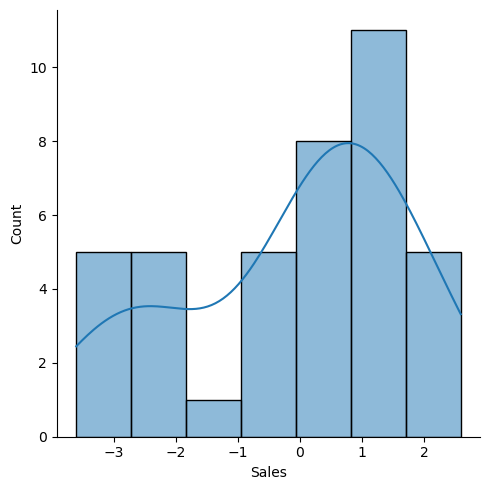

In [59]:
sns.displot(y_test-y_pred,kde=True)

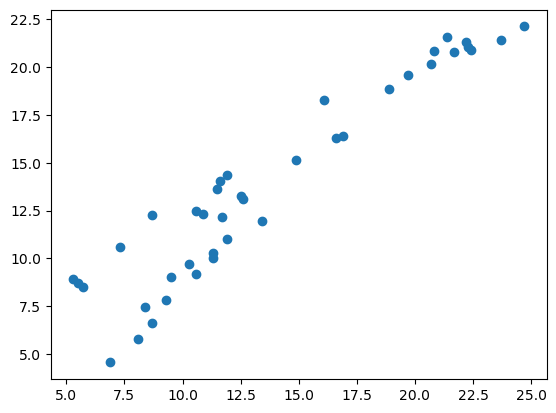

In [60]:
plt.scatter(y_test,y_pred)   

positive linear graph which indicates our model is fit and quite well trained but there are some outliers as well 


### Testing the model by new predctions

In [64]:
import warnings  
warnings.filterwarnings('ignore')

In [66]:
#we can now use the trained model to predict sales for new data
new_data = [[250,30,10]]
predicted_sales = model.predict(new_data)
print('Predicted Sales:', predicted_sales[0])

Predicted Sales: 19.86490947574668
